In [1]:
import torch as t
import torch.nn as nn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
df = yf.Ticker("AAPL").history(period="1mo")
arr = np.array(df)
tens = t.tensor(arr)[:,:4]


<Axes: >

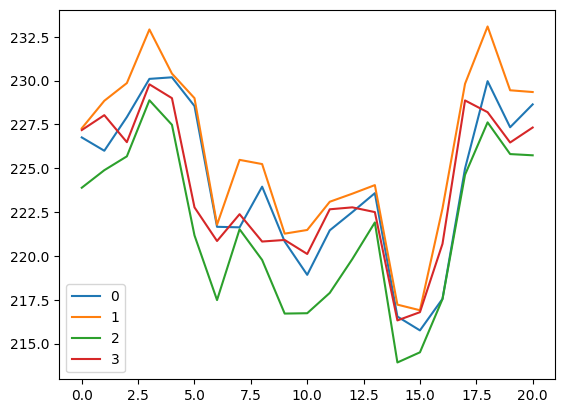

In [3]:
e = pd.DataFrame(np.asarray(tens))
e.plot()

In [12]:

e = t.from_numpy(np.array([1,2,3,4,5]))
f = t.from_numpy(np.array([6,7,8,9,10]))
d = t.hstack((e,f))
t.column_stack((e ,d))

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 5 but got size 10 for tensor number 1 in the list.